#Project 3 - Data Analysis: Identify the factors that influence sales performance
## Business problem
A company wishes to understand the interactions between its
regional performance and margins to optimize its sales strategy.
sales strategy.
## Objective
Analyze quali-quali, quali-quanti and quanti-quanti relationships in order to
detect key factors. <br>
## Skills to be acquired
Descriptive bivariate analysis: Correlations, cross-tabulations,
comparisons of means.
Advanced visualization: Scatter plots, boxplots, heatmap.
Interpretation of relationships to guide strategic decisions.

The dataset : https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download contains sales data from a supermarket. This dataset on provides detailed information about customers, products, and business performance.  

Each file includes the following columns:  
- **Row ID**: Unique identifier for each row.  
- **Order ID**: Unique identifier for each order.  
- **Order Date**: Date when the product was ordered.  
- **Ship Date**: Date when the product was shipped.  
- **Ship Mode**: Delivery method selected by the customer.  
- **Customer ID**: Unique identifier for each customer.  
- **Customer Name**: Name of the customer.  
- **Segment**: Customer segment (e.g., individual, business).  
- **Country**: Customer's country of residence.  
- **City**: Customer's city of residence.  
- **State**: Customer's state of residence.  
- **Postal Code**: Postal code of the customer.  
- **Region**: Region of the customer.  
- **Product ID**: Unique identifier for the product.  
- **Category**: Product category (e.g., furniture, technology).  
- **Sub-Category**: Sub-category of the product.  
- **Product Name**: Name of the product.  
- **Sales**: Revenue generated from the product.  
- **Quantity**: Quantity of the product sold.  
- **Discount**: Discount offered to the customer.  
- **Profit**: Profit or loss made on the sale.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_Analyst_Projects/Supertore_DA_projet3/Sample - Superstore.csv", index_col=0, encoding='latin-1')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [73]:
df.shape

(9994, 20)

In [74]:
df.columns


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

In [76]:
# Missing values

df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


There is no missing values

In [77]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [78]:
# Select all columns with numeric data types (int64 and float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Print the names of the numeric columns
print(numeric_columns)


Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [79]:
# Convert dates and calculate shipping duration
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# List of numeric columns
numeric_columns = ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

# Select all columns except the numeric ones
categorical_columns = df.drop(columns=numeric_columns).select_dtypes(include=['object']).columns

# Display the count of unique values for each categorical variable
modalities_count = df[categorical_columns].nunique()

# Print the result
print(modalities_count)


Order ID         5009
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
dtype: int64


## Descriptive bivariate analysis

### Correlations between variables

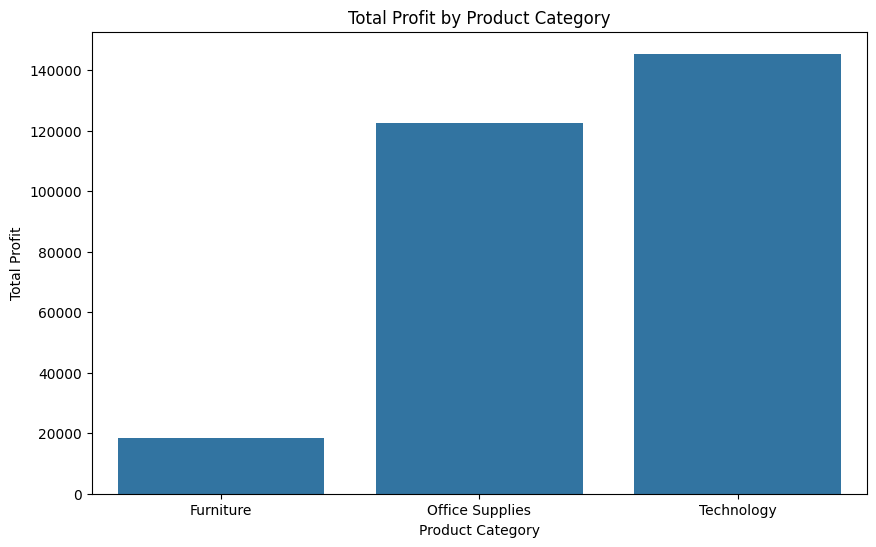

In [80]:
#Exploration of Profits by Categories, Segments, and Regions.

profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

# Create the bar plot using profit_by_category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Profit', data=profit_by_category) # Use the profit_by_category dataframe, add data=argument, and remove df=
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

        
 Tech leads in profit, followed by Office Supplies; Furniture lags.




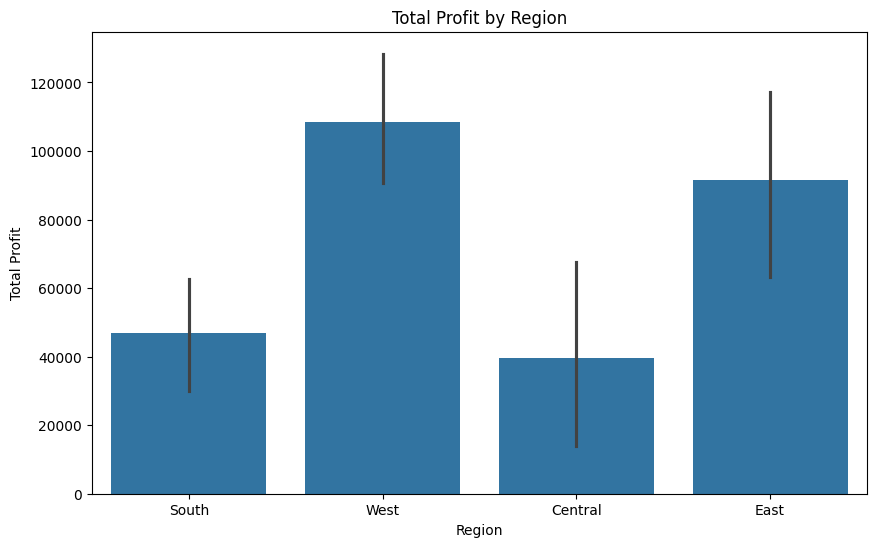

In [81]:
# Visualization of profits by region
plt.figure(figsize=(10,6))

sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

West leads in profit; South and Central lag.                                 
  The enterprise should focus on West, improve South and Central.



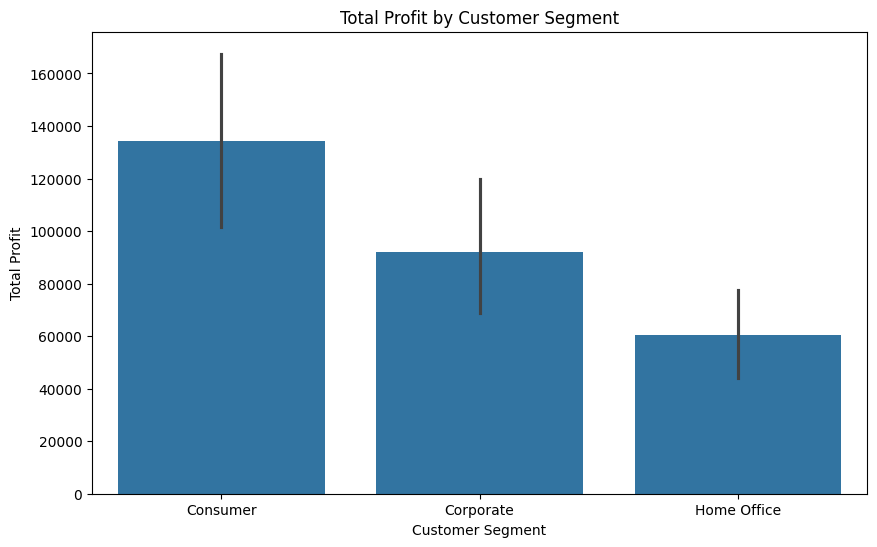

In [82]:
# Visualization of profits by customer segment
plt.figure(figsize=(10,6))
sns.barplot(x='Segment', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()

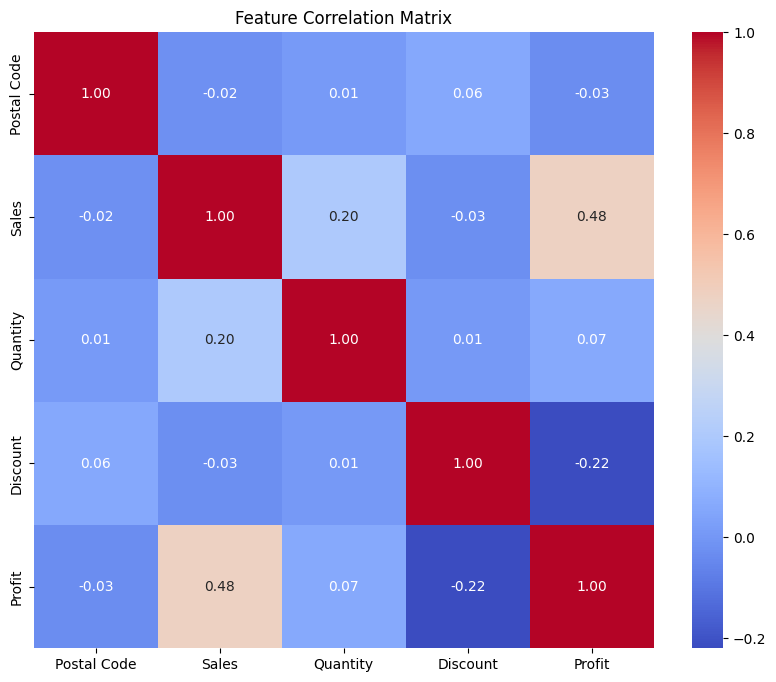

In [83]:
# Calculate the correlation matrix for only numeric columns
correlation_matrix = df.corr(numeric_only=True) # Only consider the numeric columns

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

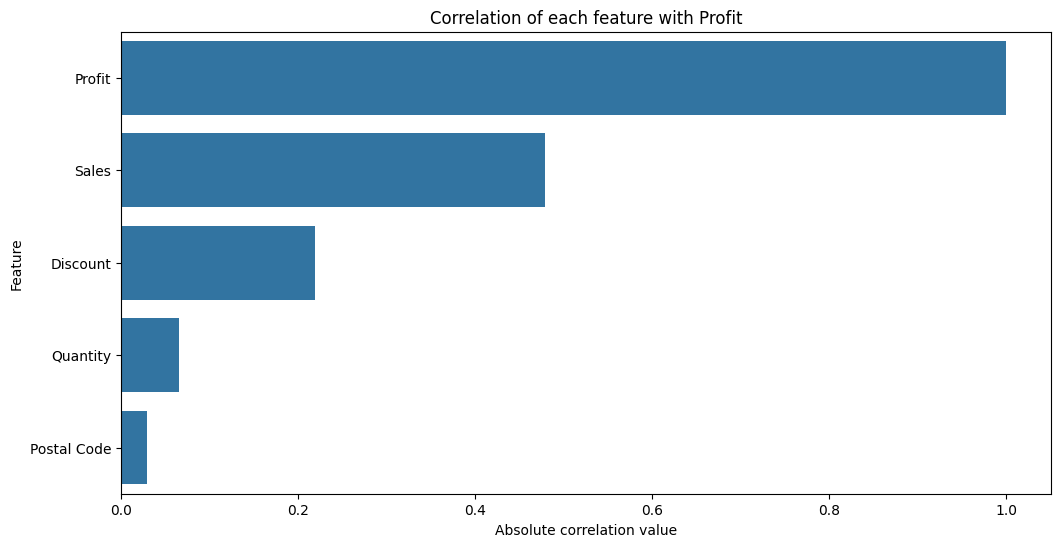

In [84]:
# Calculate the absolute correlation between each feature and the target variable 'Profit'
correlations = abs(df[numeric_columns].corr()["Profit"]).sort_values(ascending=False) # Use only numeric columns

# Visualize the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Absolute correlation value")  # X-axis label
plt.ylabel("Feature")  # Y-axis label
plt.title("Correlation of each feature with Profit")  # Title of the plot
plt.show()

 ### Cross-tabulation

In [85]:
# Crosstab: Count of orders per Segment and Category
crosstab_segment_category = pd.crosstab(df['Segment'], df['Category'])
print(crosstab_segment_category)

# Crosstab: Count of orders per Region and Category
crosstab_region_category = pd.crosstab(df['Region'], df['Category'])
print(crosstab_region_category)

Category     Furniture  Office Supplies  Technology
Segment                                            
Consumer          1113             3127         951
Corporate          646             1820         554
Home Office        362             1079         342
Category  Furniture  Office Supplies  Technology
Region                                          
Central         481             1422         420
East            601             1712         535
South           332              995         293
West            707             1897         599


*  Office Supplies is the most purchased category across all segments & regions.
*  Consumers drive the highest demand, followed by Corporate, then Home Office.
*  The West & East regions are the most active markets.



### Mean Comparisons

In [86]:
# Mean profit per Category (sorted in descending order)
mean_profit_category = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)
print(mean_profit_category)

# Mean profit per Segment
mean_profit_segment = df.groupby('Segment')['Profit'].mean().sort_values(ascending=False)
print(mean_profit_segment)

# Mean profit per Region
mean_profit_region = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)
print(mean_profit_region)

Category
Technology         78.752002
Office Supplies    20.327050
Furniture           8.699327
Name: Profit, dtype: float64
Segment
Home Office    33.818664
Corporate      30.456667
Consumer       25.836873
Name: Profit, dtype: float64
Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64


*   Technology = high profit per item, low sales volume → Highest average profit
*  Office Supplies = high sales volume, low profit per item → Moderate average profit
*  Furniture = low sales volume, low profit per item → Lowest average profit
<br>

In summary, even though *Office Supplies* dominates in sales volume,
*Technology* is the most profitable because it has higher margins per unit sold.




### Visualization and statistical tests

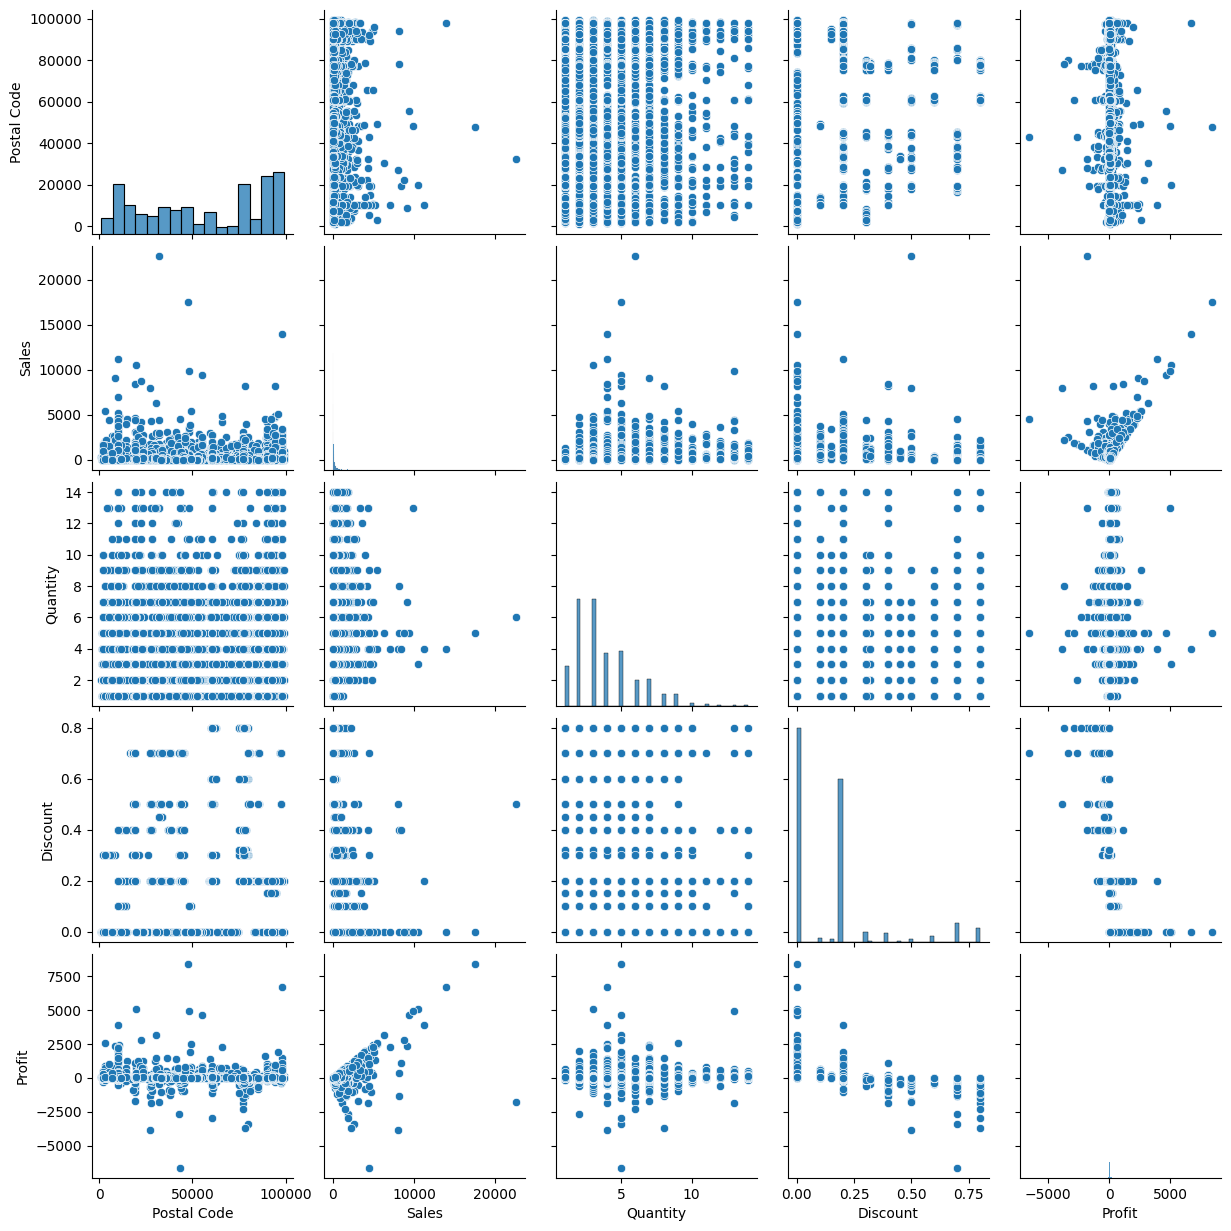

In [87]:
sns.pairplot(df,kind="scatter")

#### **Pearson Correlation Test**

*  **Hypotheses**:

H0 (Null Hypothesis): There is no linear correlation between the two variables.
<br>H1 (Alternative Hypothesis): There is a linear correlation between the two variables.
*  **Conditions for Use**:

Both variables are quantitative and measured on a continuous scale.
The relationship between the two variables is linear.
Both variables follow a normal distribution.
* **Interpretation**:  
The Pearson correlation coefficient ranges from -1 to 1.

If the coefficient is close to 1 (e.g., 0.6), there is a positive correlation between the variables.
If the coefficient is close to -1 (e.g., -0.6), there is a negative correlation between the variables.
If the coefficient is close to 0, there is no linear correlation between the variables.
You can also examine the p-value of the test:

If p < 0.05, we reject H0 and conclude that there is a significant correlation between the two variables.
If p ≥ 0.05, we do not reject H0 and conclude that there is not enough evidence to state that there is a significant correlation between the two variables

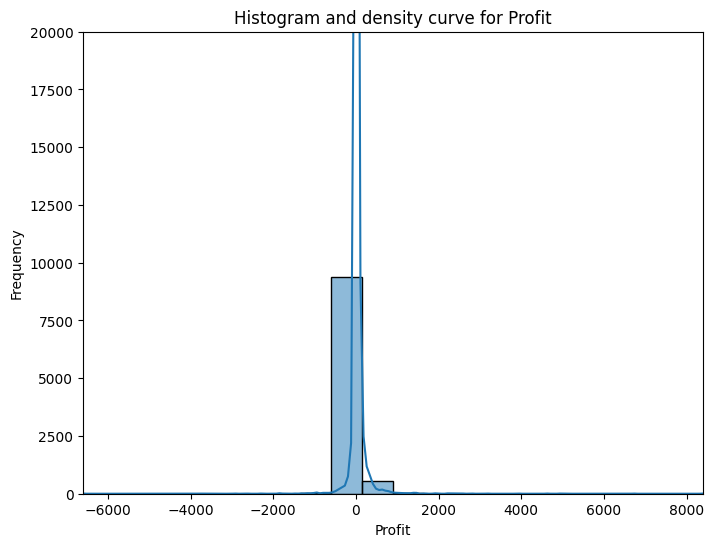

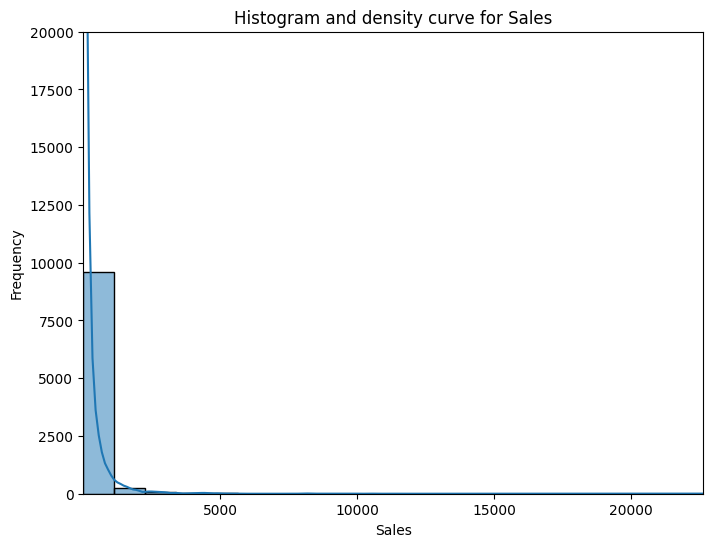

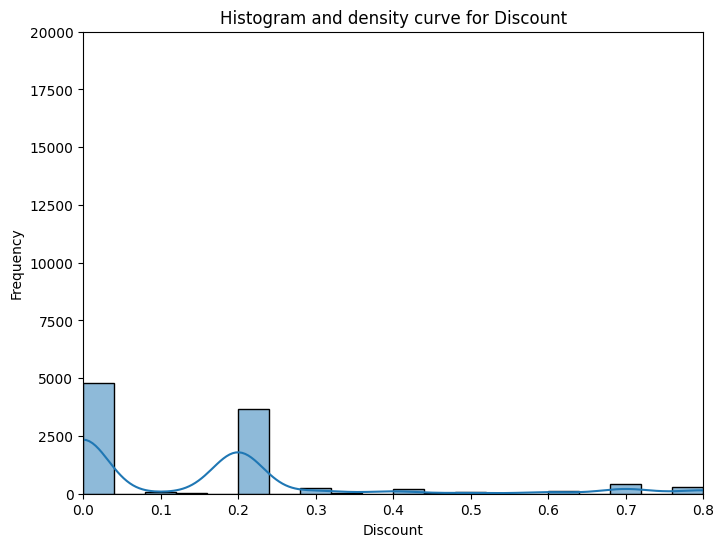

P-value of normality (Shapiro-Wilk) for Profit: 1.6987856431860357e-107
P-value of normality (Shapiro-Wilk) for Sales: 4.065053524283138e-105
P-value of normality (Shapiro-Wilk) for Discount: 1.030847481822623e-84


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9994.
  res = hypotest_fun_out(*samples, **kwds)


In [88]:
# Analysis of normality through the Shapiro test
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

# Quantitative interest variables
var1 = 'Profit'
var2 = 'Sales'
var3 = 'Discount'

# Graphical analysis of the normality of both variables
for var in [var1, var2, var3]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, bins=20)  # Adjusted number of bins
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xlim(df[var].min(), df[var].max())  # Set x-axis limits
    plt.ylim(0, 20000)  # Set y-axis limits based on the data range
    plt.title(f"Histogram and density curve for {var}")
    plt.show()

# Verify the normality through the Shapiro-Wilk test
for var in [var1, var2, var3]:
    _, p_value = shapiro(df[var])
    print(f"P-value of normality (Shapiro-Wilk) for {var}:", p_value)


Since both p-values are far below the typical significance threshold of 0.05, we reject the null hypothesis of normality for these variables.
<br> This means that none of "Profit", "Sales" and "Discount" follows a normal distribution.

Consequently, the Pearson correlation test, which assumes normality, is not suitable for these two variables.

In [89]:
pearsonr(df[var1], df[var2])  # 'Profit' and 'Sales'


PearsonRResult(statistic=0.4790643497377061, pvalue=0.0)

In [90]:
pearsonr(df[var1], df[var3]) # 'Profit' and 'Discount'

PearsonRResult(statistic=-0.21948745637176847, pvalue=2.702294436198942e-109)

In [91]:
pearsonr(df[var2], df[var3]) # 'Sales' and 'Discount'

PearsonRResult(statistic=-0.028190124157535565, pvalue=0.00482675292533218)

#### **Spearman Correlation**

Hypotheses:

H0: There is no monotonic correlation between the two variables.
<br>H1: There is a monotonic correlation between the two variables.
Usage Conditions:

<br>Both variables are quantitative or ordinal.
Data do not need to be normally distributed.
The relationship between the variables can be monotonic (linear or non-linear).
Interpretation:

The Spearman correlation coefficient ranges from -1 to 1.
A coefficient close to 1 (e.g., 0.6) indicates a positive correlation.
A coefficient close to -1 (e.g., -0.6) indicates a negative correlation.
A coefficient near 0 indicates no monotonic correlation.

<br>Regarding the p-value:
<br>If p < 0.05, we reject H0 and conclude that there is a significant monotonic correlation.
<br>If p ≥ 0.05, we do not reject H0, meaning there is insufficient evidence of a significant monotonic correlation.

In [92]:
spearmanr(df[var1], df[var2])  # 'Profit' and 'Sales'


SignificanceResult(statistic=0.5184066611400607, pvalue=0.0)

In [93]:
spearmanr(df[var2], df[var3]) # 'Sales' and 'Discount'

SignificanceResult(statistic=-0.05696855074893832, pvalue=1.204685669506915e-08)

In [94]:
spearmanr(df[var1], df[var3]) # 'Profit' and 'Discount'

SignificanceResult(statistic=-0.5433501822306213, pvalue=0.0)

#### **Kendall's Correlation Test**  
**Hypotheses**:  
H0: There is no monotonic correlation between the two variables.  
H1: There is a monotonic correlation between the two variables.  

**Conditions for Use**:  
- Both variables are quantitative or ordinal.  
- Data does not need to be normally distributed.  
- The relationship between the variables can be monotonic (linear or nonlinear).  

**Interpretation**:  
- The Kendall correlation coefficient ranges from -1 to 1.  
- If the coefficient is close to 1 (threshold at 70%), there is a positive correlation between the variables.  
- If the coefficient is close to -1, there is a negative correlation.  
- If the coefficient is close to 0, there is no monotonic correlation.





- If p < 0.05, reject H0 and conclude that there is a significant monotonic correlation between the variables.  
- If p ≥ 0.05, fail to reject H0 and conclude there is insufficient evidence for a significant monotonic correlation between the variables.

In [95]:
kendalltau(df[var1], df[var2])  # 'Profit' and 'Sales'


SignificanceResult(statistic=0.4521182435817151, pvalue=0.0)

In [96]:
kendalltau(df[var1], df[var3]) # 'Profit' and 'Discount'

SignificanceResult(statistic=-0.4282053996720508, pvalue=0.0)

In [97]:
kendalltau(df[var2], df[var3]) # 'Sales' and 'Discount'

SignificanceResult(statistic=-0.041826445088043146, pvalue=5.42125948169342e-08)

In [98]:
df.dtypes

,0
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object
State,object


### **Analysis of the relationship between two qualitative variables**

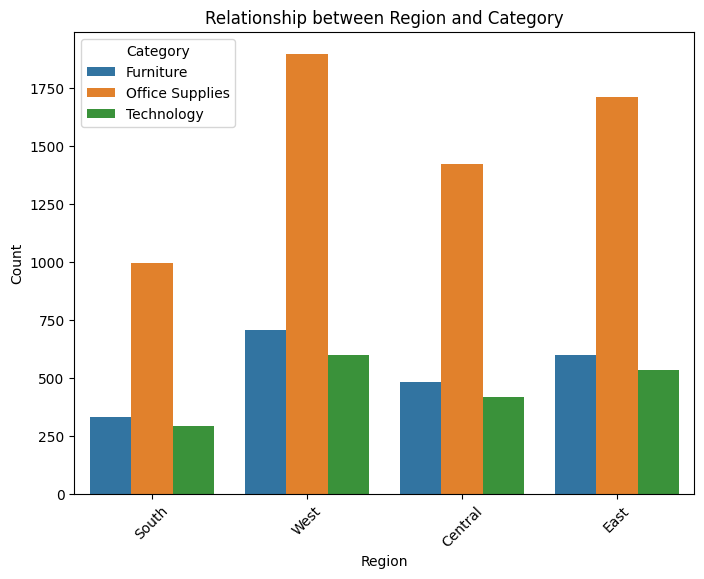

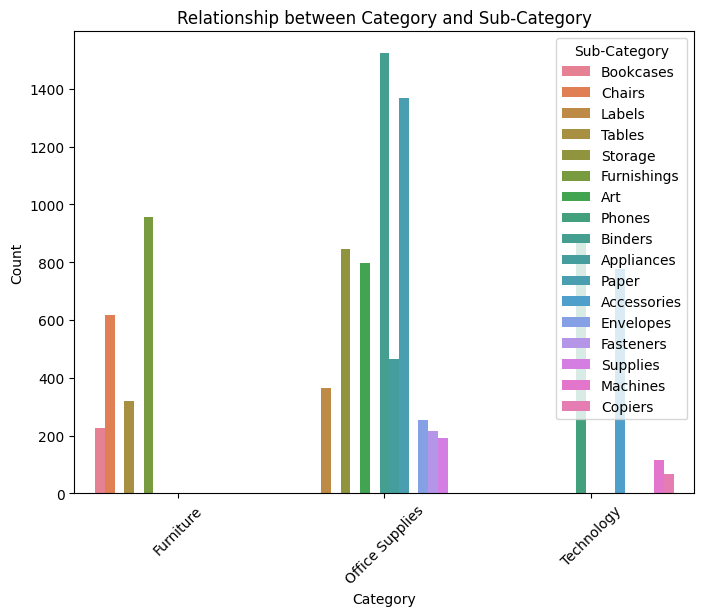

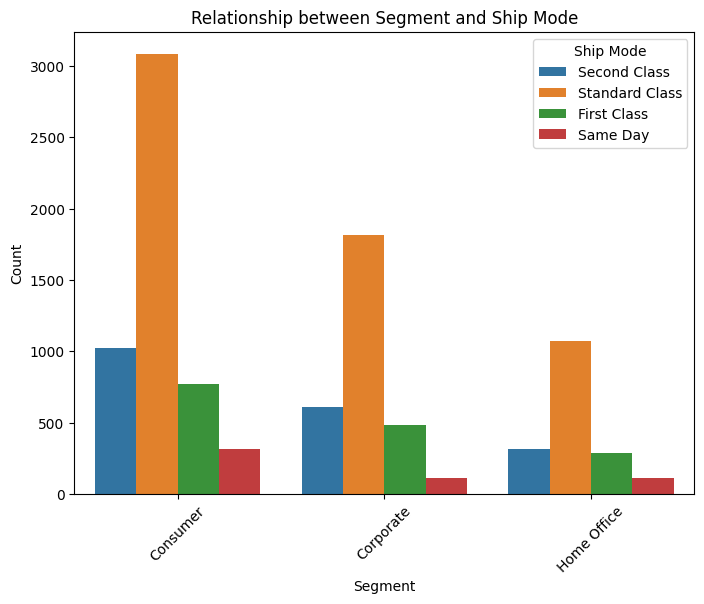

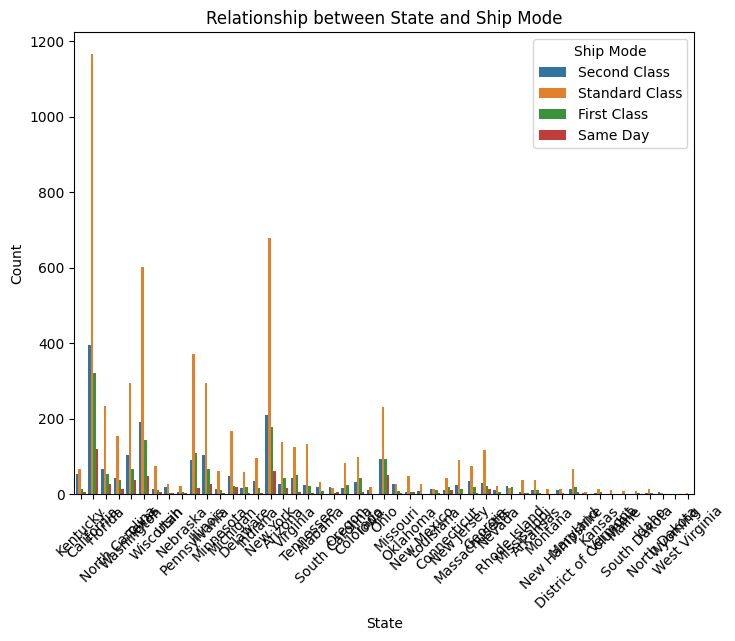

In [99]:
# List of relevant categorical variable pairs for analysis
qual_qual_pairs = [
    ('Region', 'Category'),       # Regional distribution of product categories
    ('Category', 'Sub-Category'), # Relationship between main categories and sub-categories
    ('Segment', 'Ship Mode'),     # Shipping preferences by customer segment
    ('State', 'Ship Mode')        # Shipping mode distribution across states
]

# Generate count plots for each pair
for x_var, hue_var in qual_qual_pairs:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=x_var, hue=hue_var)
    plt.xlabel(x_var)
    plt.ylabel('Count')
    plt.title(f'Relationship between {x_var} and {hue_var}')
    plt.xticks(rotation=45)
    plt.show()


#### **Chi-Square Test (χ²)**  

 **Hypotheses**  
- **H₀ (Null Hypothesis):** There is no association between the two categorical variables.  
- **H₁ (Alternative Hypothesis):** There is an association between the two categorical variables.  

**Conditions for Use**  
- Both variables must be **categorical**.  
- The **expected frequencies** should be greater than **5** in each cell of the contingency table.  

**Interpretation**  
- If the **p-value** is lower than the significance threshold (typically **0.05**), we reject the null hypothesis and conclude that there is a **significant association** between the two categorical variables.

In [100]:
from scipy.stats import chi2_contingency

# Generate and display contingency tables separately
for var1, var2 in qual_qual_pairs:
    contingency_table = pd.crosstab(df[var1], df[var2])

    # Display the table with a clear title
    print(f"\n Contingency Table for **{var1} vs {var2}**:\n")
    display(contingency_table)  # Beautiful table display
    print("\n" + "-" * 80 + "\n")  # Separation line


 Contingency Table for **Region vs Category**:



Category,Furniture,Office Supplies,Technology
Region,,,
Central,481,1422,420
East,601,1712,535
South,332,995,293
West,707,1897,599



--------------------------------------------------------------------------------


 Contingency Table for **Category vs Sub-Category**:



Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,228,617,0,0,0,957,0,0,0,0,0,0,319
Office Supplies,0,466,796,1523,0,0,0,254,217,0,364,0,1370,0,846,190,0
Technology,775,0,0,0,0,0,68,0,0,0,0,115,0,889,0,0,0



--------------------------------------------------------------------------------


 Contingency Table for **Segment vs Ship Mode**:



Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,769,317,1020,3085
Corporate,485,114,609,1812
Home Office,284,112,316,1071



--------------------------------------------------------------------------------


 Contingency Table for **State vs Ship Mode**:



Ship Mode,First Class,Same Day,Second Class,Standard Class
State,,,,
Alabama,9,1,18,33
Arizona,42,16,27,139
Arkansas,10,2,10,38
California,322,119,395,1165
Colorado,44,6,33,99
Connecticut,19,10,11,42
Delaware,18,2,16,60
District of Columbia,0,0,3,7
Florida,54,28,67,234



--------------------------------------------------------------------------------



Knowing that all of these variables have more than 5 modalities, the Chi² test will be relevant, so let's perform it.

In [101]:
from scipy.stats import chi2_contingency

# Region vs Category
contingency_table_region_category = pd.crosstab(df['Region'], df['Category'])
chi2_stat1, p_value1, dof1, expected_freq1 = chi2_contingency(contingency_table_region_category)
print("Chi² Test for Region vs Category:")
print(f"Statistique du chi-carré : {chi2_stat1}")
print(f"P-valeur : {p_value1}")
print(f"Degrés de liberté : {dof1}")
print(f"Fréquences attendues :\n{expected_freq1}\n")

# Segment vs Ship Mode
contingency_table_segment_shipmode = pd.crosstab(df['Segment'], df['Ship Mode'])
chi2_stat2, p_value2, dof2, expected_freq2 = chi2_contingency(contingency_table_segment_shipmode)
print("Chi² Test for Segment vs Ship Mode:")
print(f"Statistique du chi-carré : {chi2_stat2}")
print(f"P-valeur : {p_value2}")
print(f"Degrés de liberté : {dof2}")
print(f"Fréquences attendues :\n{expected_freq2}")


Chi² Test for Region vs Category:
Statistique du chi-carré : 3.661930938326572
P-valeur : 0.7223155543986877
Degrés de liberté : 6
Fréquences attendues :
[[ 493.00410246 1400.68020812  429.31568941]
 [ 604.42345407 1717.23514108  526.34140484]
 [ 343.80828497  976.79807885  299.39363618]
 [ 679.7641585  1931.28657194  591.94926956]]

Chi² Test for Segment vs Ship Mode:
Statistique du chi-carré : 28.097944167868896
P-valeur : 9.005463273040477e-05
Degrés de liberté : 6
Fréquences attendues :
[[ 798.85511307  282.04052431 1010.25565339 3099.84870923]
 [ 464.75485291  164.08445067  587.74264559 1803.41805083]
 [ 274.39003402   96.87502502  347.00170102 1064.73323994]]


Firstly, the p-value  is greater than the common threshold of 0.05, we fail to reject H0. This means there is no significant association between the *Region* and *Category*. The two variables are independent of each other based on this test.

Secondly, the p-value (0.00009) is much smaller than 0.05, we reject the null hypothesis. It means, there is a significant association between the *Segment* and **Ship Mode** variables. The choice of shipping mode depends on the customer segment, indicating a relationship between these two variables.


#### **Fisher's Exact Test**

The following code applies Fisher's Exact Test to contingency tables from categorical variables. Fisher’s test is used instead of the Chi-squared test for small sample sizes or when expected frequencies are below 5.

It analyzes two relationships:

- 'Category' vs 'Sub-Category'
- 'State' vs 'Ship Mode'

The code checks both full tables and 2x2 sub-tables (required for Fisher's test), calculating p-values to assess statistical significance.

In [110]:
from scipy.stats import fisher_exact

# Create contingency tables
contingency_table_category_subcategory = pd.crosstab(df['Category'], df['Sub-Category'])
contingency_table_state_shipmode = pd.crosstab(df['State'], df['Ship Mode'])

# Function to apply Fisher's Exact Test to 2x2 sub-tables
def apply_fisher_exact_to_subtables(contingency_table):
    results = {}
    # Check if the table itself is 2x2
    if contingency_table.shape == (2, 2):
        _, p_value = fisher_exact(contingency_table)
        results['Whole table'] = p_value
    else:
        # Iterate over all combinations of rows and columns
        for row_start in range(contingency_table.shape[0]):
            for col_start in range(contingency_table.shape[1]):
                # Extract a 2x2 sub-table
                if row_start + 1 < contingency_table.shape[0] and col_start + 1 < contingency_table.shape[1]:
                    subtable = contingency_table.iloc[row_start:row_start+2, col_start:col_start+2]
                    if subtable.shape == (2, 2):  # Check if it's a valid 2x2 table
                        _, p_value = fisher_exact(subtable)
                        results[(contingency_table.index[row_start], contingency_table.columns[col_start])] = p_value
    return results

# Apply Fisher's Exact Test to both tables
fisher_results_category_subcategory = apply_fisher_exact_to_subtables(contingency_table_category_subcategory)
fisher_results_state_shipmode = apply_fisher_exact_to_subtables(contingency_table_state_shipmode)

# Display results
print("Fisher's Exact Test results for Category vs Sub-Category:")
print(fisher_results_category_subcategory)

print("\nFisher's Exact Test results for State vs Ship Mode:")
print(fisher_results_state_shipmode)


Fisher's Exact Test results for Category vs Sub-Category:
{('Furniture', 'Accessories'): 1.0, ('Furniture', 'Appliances'): 1.0, ('Furniture', 'Art'): 1.0, ('Furniture', 'Binders'): 2.6000528070279975e-293, ('Furniture', 'Bookcases'): 1.0, ('Furniture', 'Chairs'): 1.0, ('Furniture', 'Copiers'): 1.0, ('Furniture', 'Envelopes'): 1.0, ('Furniture', 'Fasteners'): 3.0009337968076913e-243, ('Furniture', 'Furnishings'): 0.0, ('Furniture', 'Labels'): 1.0, ('Furniture', 'Machines'): 1.0, ('Furniture', 'Paper'): 1.0, ('Furniture', 'Phones'): 1.0, ('Furniture', 'Storage'): 1.0, ('Furniture', 'Supplies'): 2.4563875142415292e-145, ('Office Supplies', 'Accessories'): 0.0, ('Office Supplies', 'Appliances'): 1.0, ('Office Supplies', 'Art'): 1.0, ('Office Supplies', 'Binders'): 1.0, ('Office Supplies', 'Bookcases'): 1.0, ('Office Supplies', 'Chairs'): 1.0, ('Office Supplies', 'Copiers'): 1.4899614163944574e-71, ('Office Supplies', 'Envelopes'): 1.0, ('Office Supplies', 'Fasteners'): 1.0, ('Office Suppli

Category vs Sub-Category:
<br>Many p-values are extremely close to 1 (indicating no significant association between certain categories), with some values like 0 (such as for 'Furniture' vs 'Furnishings') or extremely small p-values (e.g., 2.6000528070279975e-293 for 'Furniture' vs 'Binders') indicating a very strong association.


State vs Ship Mode:
<br>The p-values for "State vs Ship Mode" also vary significantly across states and ship modes. For example, for "Alabama" and "Same Day" shipping, the p-value is 0.012, indicating a potential significant association. Similarly, for "Mississippi" and "Second Class" shipping, the p-value is extremely small (0.00030769856950936287), suggesting a strong association.

### **Analysis of the relationship between quantiative and qualitative variables**

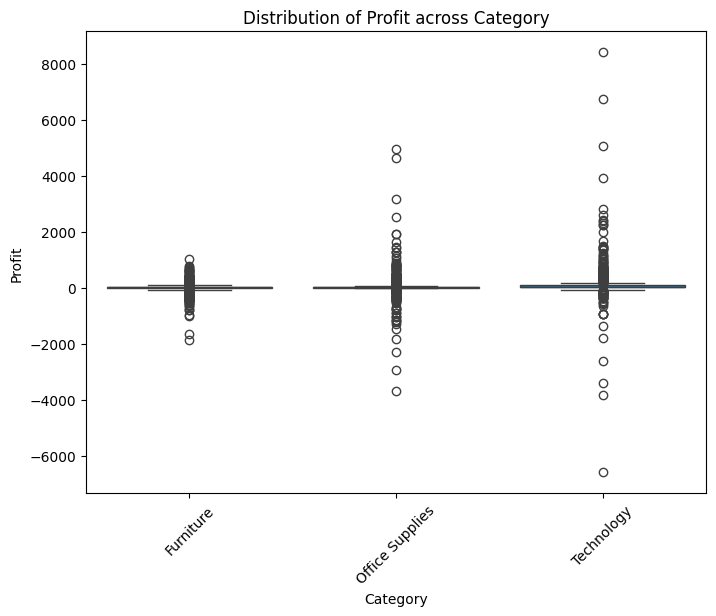

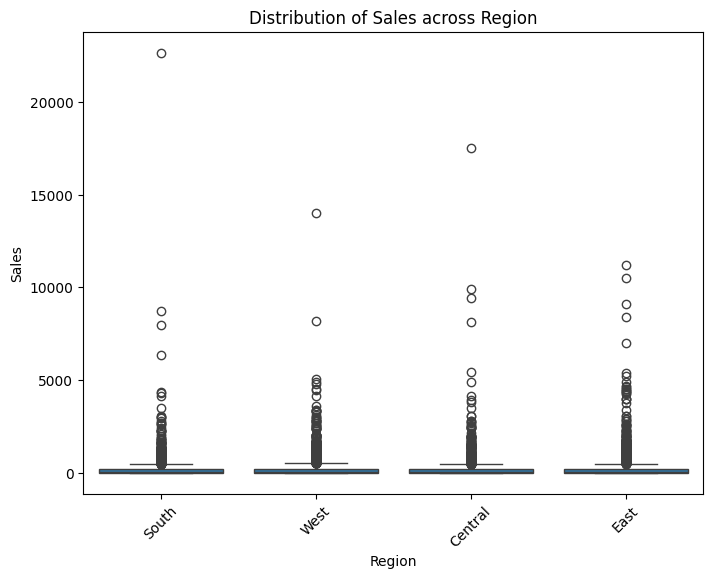

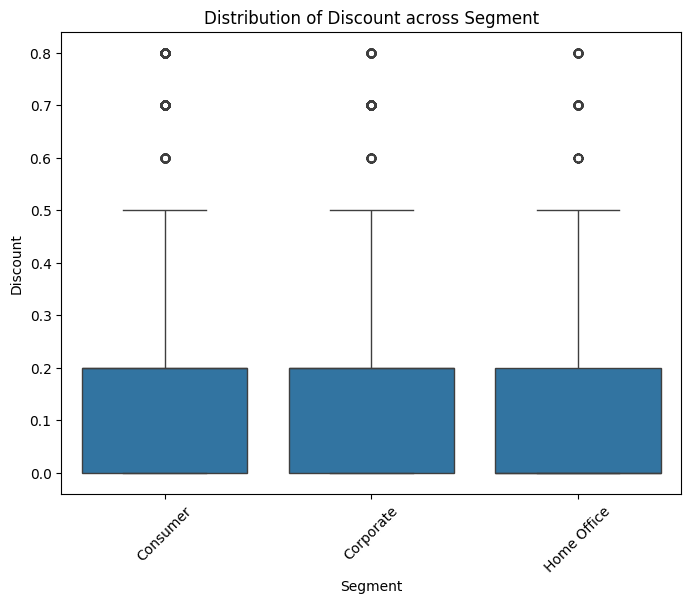

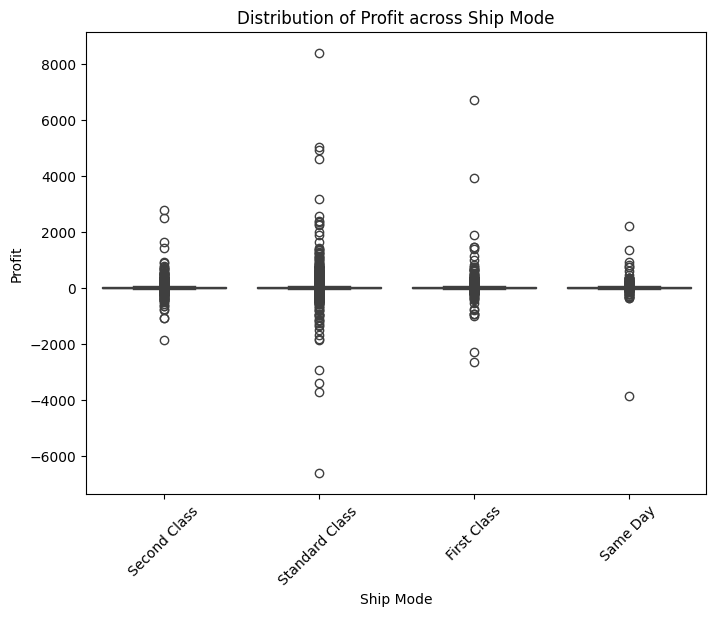

In [112]:
# Categorical vs. Numerical Analysis
qual_quan_pairs = [
    ('Category', 'Profit'),
    ('Region', 'Sales'),
    ('Segment', 'Discount'),
    ('Ship Mode', 'Profit')
]

# Loop over each pair of categorical and numerical variables
for cat_var, num_var in qual_quan_pairs:
    plt.figure(figsize=(8, 6))

    sns.boxplot(data=df, x=cat_var, y=num_var)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.title(f'Distribution of {num_var} across {cat_var}')
    plt.xticks(rotation=45)
    plt.show()


Given that we have 3 or 4 groups per categorical variables and the continuous variables (Profit, Sales, Discount) may not meet normality assumptions, the Kruskal-Wallis test is the most appropriate choice. This non-parametric test compares medians across groups without requiring normal distribution, making it suitable for our data.

#### **Kruskal-Wallis Test**
**Hypotheses:**  
H0 (null hypothesis): The distributions of all groups are equal.  
H1 (alternative hypothesis): At least one group's distribution is different from the others.  

**Assumptions:**  
Observations are independent.  
Data are at least ordinal (i.e., can be ordered).

In [117]:
from scipy.stats import kruskal #

# Loop over each pair in qual_quan_pairs (which is already defined) and perform the Kruskal-Wallis test
for cat_var, num_var in qual_quan_pairs:
    groups = [df[df[cat_var] == grp][num_var].dropna() for grp in df[cat_var].unique()]
    kruskal_stat, kruskal_p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for {cat_var} vs {num_var}: H = {kruskal_stat:.2f}, p = {kruskal_p_value:.4f}")


Kruskal-Wallis test for Category vs Profit: H = 445.90, p = 0.0000
Kruskal-Wallis test for Region vs Sales: H = 26.10, p = 0.0000
Kruskal-Wallis test for Segment vs Discount: H = 6.93, p = 0.0313
Kruskal-Wallis test for Ship Mode vs Profit: H = 11.13, p = 0.0110


Given that all p-values are below the common significance level of 0.05, we reject the H0 in each case.
<br>Therefore, there are statistically significant differences in the distributions of the numerical variables across the categories of the respective categorical variables.